In [1]:
#point to lunar library locally
import sys
sys.path.append('/Users/oakley/Documents/GitHub/lunar')


# Import the required functions from your lunar library
from lunar.find_contours import find_contours_from_videos
from lunar.plot_contours import plot_contours
from lunar.identify_glare import process_large_file
from lunar.label_tanx import analyze_contours
from lunar import match_cameras
from lunar import plot_matched
from lunar.smooth_contours import smooth_contours, smooth_contours_sem
from lunar.plot_glare_contours import plot_glare_contours
from lunar.identify_glare import clip_ends

In [1]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os

def process_videos(video_files, max_frames=3000000, step =300, output_file="brightness.tsv"):
    writefile = open('brightness_' + output_file, 'w')
    writefile.write("frame\tbrightness\tvideo\n")
    frame_nums = []
    frame_num = 0
    local_frame_num = []
    for video_file in video_files:
        cap = cv2.VideoCapture(video_file)
        local_frame_num = 0
        while cap.isOpened() and local_frame_num < max_frames:
            cap.set(cv2.CAP_PROP_POS_FRAMES, local_frame_num)
            ret, frame = cap.read()
            if not ret:
                break
            avg_brightness = cv2.mean(frame)[0]
            writefile.write(f"{frame_num}\t{avg_brightness}\t{video_file}\n")
            frame_num += step
            local_frame_num += step
        cap.release()
def calc_brightness(video_pattern, max_frames=3000000, step=300, output_file="brightness.tsv"):
    video_files = sorted(glob.glob(video_pattern))
    if not video_files:
        print(f"No videos matched pattern: {video_pattern}")
        return
    return process_videos(video_files, max_frames, step, output_file)



In [2]:
calc_brightness("/Users/oakley/Desktop/VideoAnalysis/PuertoMorelos_13Mar2025_FM_LE_GXU/out_*.mp4", output_file="MXLE.tsv")

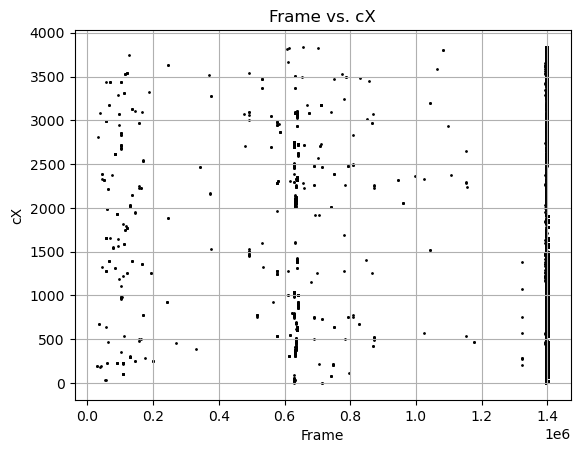

In [2]:
# Plot the contours data
output_file = '/Users/oakley/Documents/GitHub/lunar/lunar/contours_MXLE.tsv'
plot_contours(output_file)

In [25]:
from lunar.match_splitframe import match_splitframe_contours

match_splitframe_contours(
    input_file=output_file,
    output_file="matched_MXLE.tsv",
    distance_x=450,           # optional: tweak as needed
    distance_y=75,           # optional
    frame_width=3840          # optional: set to your video frame width
)



Output written to matched_MXLE.tsv


In [26]:
import pandas as pd

df = pd.read_csv("matched_MXLE.tsv", sep='\t')
df['match'].value_counts()



match
L    28863
R     2178
N      514
Name: count, dtype: int64